In [1]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import clamp_experiment_analysis as ea

In [23]:
runs = ea.get_all_expe()
runs

['1616604439#EXPE1']

In [24]:
run = '1616604439#EXPE1'
df = ea.get_expe_results(run)
df

   dataset       pool  k_init  k_refinement  max_epochs  n_sampling  \
0   boston  AutoGluon      10             0           0         100   
1   boston  AutoGluon      10             0           1         100   
2   boston  AutoGluon      10             0           2         100   
3   boston  AutoGluon      10             0           3         100   
4   boston  AutoGluon      10             0           4         100   
5   boston  AutoGluon      10             0           5         100   
6   boston  AutoGluon      10             0           6         100   
7   boston  AutoGluon      10             0           7         100   
8   boston  AutoGluon      10             0           8         100   
9   boston  AutoGluon      10             0           9         100   
10  boston  AutoGluon      10             0          10         100   
11  boston  AutoGluon      10             0          11         100   
12  boston  AutoGluon      10             0          12         100   
13  bo

   dataset       pool  k_init  k_refinement  max_epochs  n_sampling  \
0   boston  AutoGluon      10             0           0         100   
1   boston  AutoGluon      10             0           1         100   
2   boston  AutoGluon      10             0           2         100   
3   boston  AutoGluon      10             0           3         100   
4   boston  AutoGluon      10             0           4         100   
5   boston  AutoGluon      10             0           5         100   
6   boston  AutoGluon      10             0           6         100   
7   boston  AutoGluon      10             0           7         100   
8   boston  AutoGluon      10             0           8         100   
9   boston  AutoGluon      10             0           9         100   
10  boston  AutoGluon      10             0          10         100   
11  boston  AutoGluon      10             0          11         100   
12  boston  AutoGluon      10             0          12         100   
13  bo

,pool,dataset,k_init,k_refinement,max_epochs,n_sampling,competitor,average score,n_replication
0,AutoGluon,boston,10,0,0,100,scores,0.688319,0
1,AutoGluon,boston,10,0,1,100,scores,0.690022,0
2,AutoGluon,boston,10,0,2,100,scores,0.690070,0
3,AutoGluon,boston,10,0,3,100,scores,0.731954,0
4,AutoGluon,boston,10,0,4,100,scores,0.730441,0
...,...,...,...,...,...,...,...,...,...
100,AutoGluon,boston,10,0,16,100,scores,0.916494,4
101,AutoGluon,boston,10,0,17,100,scores,0.943362,4
102,AutoGluon,boston,10,0,18,100,scores,0.926135,4
103,AutoGluon,boston,10,0,19,100,scores,0.948087,4


(400, 9)

Index(['pool', 'dataset', 'k_init', 'k_refinement', 'max_epochs', 'n_sampling',
       'competitor', 'average score', 'n_replication'],
      dtype='object')


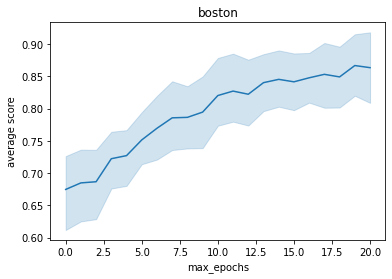

In [30]:
dfas = df.copy()
#dfas = df[df.pool=="AutoGluon"]
#dfas = dfas[dfas.max_epochs>3]
#dfas = dfas[dfas.k_refinement==0]
#dfas = dfas[dfas.competitor.isin(['P2G-xgb', 'RandomSampling-xgb'])]
#dfas.shape

for d in df.dataset.unique():

    tmp = dfas[dfas.dataset==d]
    print(tmp.columns)
    #tmp = tmp.groupby(['pool','dataset','k_init','k_refinement','max_epochs','n_sampling','competitor']).mean()
    #tmp = tmp.reset_index()
    '''
    Il faut changer le groupby du dessus, enlever je pense le n_replication
    '''
    
    plt.figure()
    ax = sns.lineplot(x="max_epochs", y="average score", data=tmp)
    ax.set_title(d)

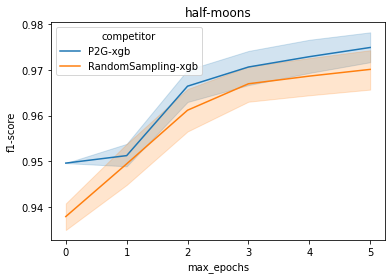

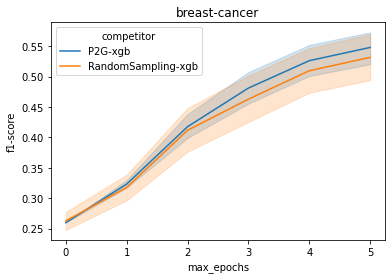

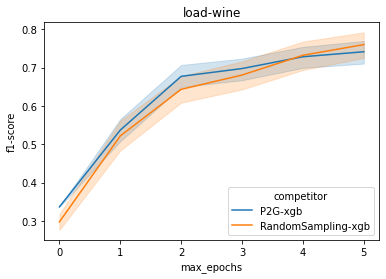

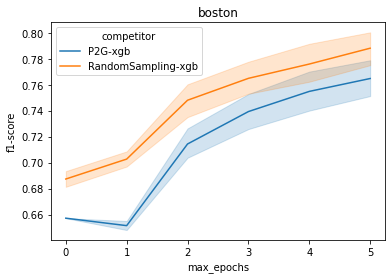

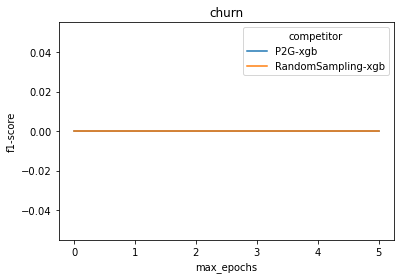

In [29]:
dfas = df[df.pool=="AutoSklearn"]
#dfas = dfas[dfas.max_epochs>3]
#dfas = dfas[dfas.k_refinement==0]
dfas = dfas[dfas.competitor.isin(['P2G-xgb', 'RandomSampling-xgb'])]
dfas.shape

for d in df.dataset.unique():

    tmp = dfas[dfas.dataset==d]

    tmp = tmp.groupby(['pool','dataset','k_init','k_refinement','max_epochs','n_sampling','n_replication','competitor']).mean()
    tmp = tmp.reset_index()
    
    plt.figure()
    ax = sns.lineplot(x="max_epochs", y="f1-score", hue="competitor", data=tmp)
    ax.set_title(d)

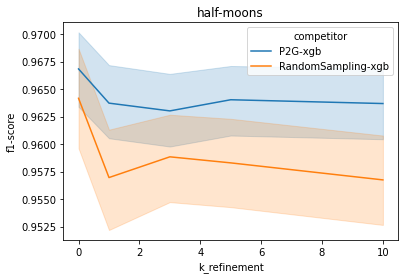

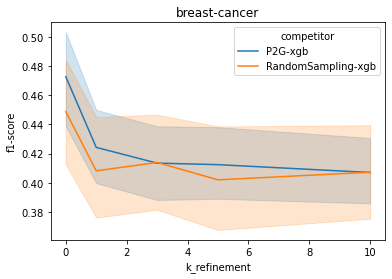

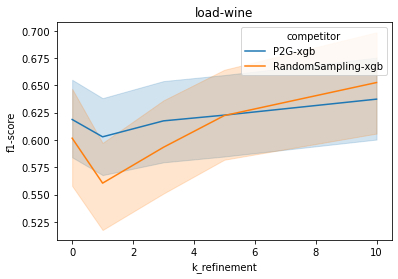

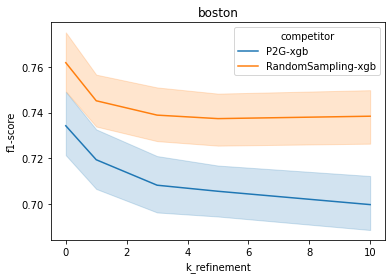

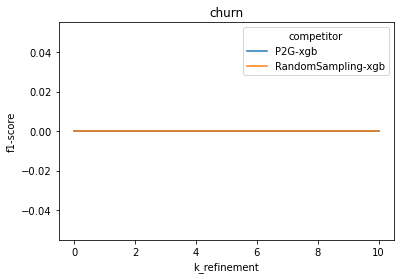

In [30]:
dfas = df[df.pool=="AutoSklearn"]
#dfas = dfas[dfas.max_epochs>3]
#dfas = dfas[dfas.k_refinement==0]
dfas = dfas[dfas.competitor.isin(['P2G-xgb', 'RandomSampling-xgb'])]
dfas.shape

for d in df.dataset.unique():

    tmp = dfas[dfas.dataset==d]

    tmp = tmp.groupby(['pool','dataset','k_init','k_refinement','max_epochs','n_sampling','n_replication','competitor']).mean()
    tmp = tmp.reset_index()
    
    plt.figure()
    ax = sns.lineplot(x="k_refinement", y="f1-score", hue="competitor", data=tmp)
    ax.set_title(d)